In [1]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Os dataframes serao organizados de forma que o range de datas abaixo represente os anos estudados
range_anos = list(map(str,range(2010,2021)))

In [3]:
igpm = pd.read_html("http://www.yahii.com.br/igpm.html", index_col = 0)[2]
igpm.columns = igpm.iloc[0]
igpm.drop(igpm.index[0], inplace = True)
igpm = igpm[["ACUMULADO"]]
igpm.index.name = ""
igpm = igpm.loc[range_anos]

#Para transformar corretamente as strings em floats 
igpm['ACUMULADO'] = igpm['ACUMULADO'].str.replace('%','')
igpm['ACUMULADO'] = igpm['ACUMULADO'].str.replace('(','')
igpm['ACUMULADO'] = igpm['ACUMULADO'].str.replace(')','')
igpm['ACUMULADO'] = igpm['ACUMULADO'].str.replace(',','.')
igpm['ACUMULADO'] = igpm['ACUMULADO'].astype(float)

In [4]:
ipca = pd.read_html("http://www.yahii.com.br/ipca.html", index_col = 0)[2]
ipca.columns = ipca.iloc[0]
ipca.drop(ipca.index[0], inplace = True)
ipca = ipca[["ACUMULADO"]]
ipca.index.name = ""
ipca = ipca.loc[range_anos]

#Para transformar corretamente as strings em floats 
ipca['ACUMULADO'] = ipca['ACUMULADO'].str.replace('%','')
ipca['ACUMULADO'] = ipca['ACUMULADO'].str.replace('(','')
ipca['ACUMULADO'] = ipca['ACUMULADO'].str.replace(')','')
ipca['ACUMULADO'] = ipca['ACUMULADO'].str.replace(',','.')
ipca['ACUMULADO'] = ipca['ACUMULADO'].astype(float)

In [5]:
cdi = pd.read_csv("CDI_Desde_2010.csv", dtype = np.float64)
cdi["ACUMULADO"] = cdi["ACUMULADO"].round(2)

In [6]:
anual = pd.DataFrame(index = range_anos)
anual["IGPM"] = igpm["ACUMULADO"]
anual["IPCA"] = ipca["ACUMULADO"]
anual["CDI"] = list(cdi["ACUMULADO"])
anual["Retorno real IGPM"] = round(((1 + (anual["CDI"] / 100)) / (1 + (anual["IGPM"]/100)) - 1) * 100,2)
anual["Retorno real IPCA"] = round(((1 + (anual["CDI"] / 100)) / (1 + (anual["IPCA"]/100)) - 1) * 100,2)

In [7]:
ret_ipca = anual[["IPCA", "CDI", "Retorno real IPCA"]]

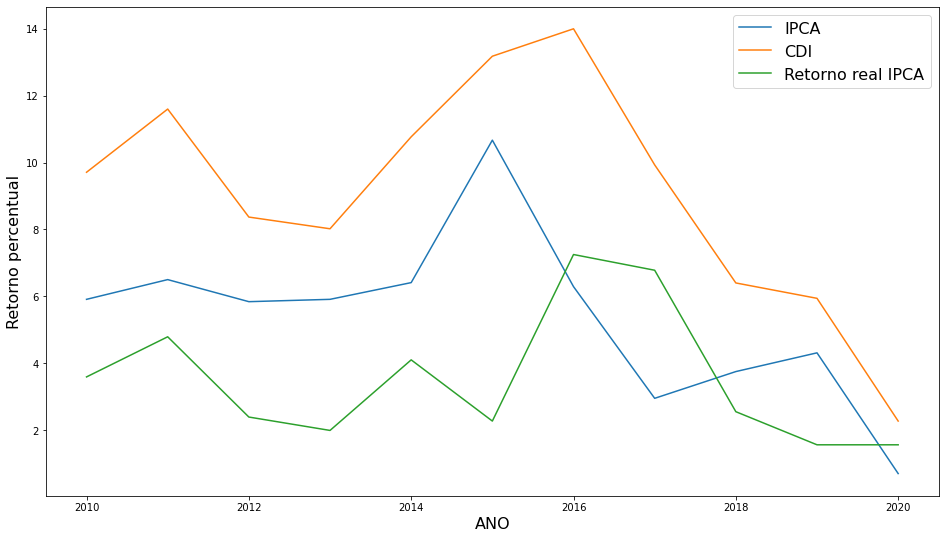

In [8]:
ret_ipca.plot(figsize=(16,9))
plt.ylabel('Retorno percentual', fontsize = 16)
plt.xlabel('ANO', fontsize = 16)
plt.legend(fontsize = 16)
plt.savefig(fname="Juros desde 2010", dpi = 300)
plt.show()